<a href="https://colab.research.google.com/github/abdulaneef002/FUTURE_DS-02/blob/main/ad_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date      Campaign  Platform  Impressions  Clicks  Likes  Comments  \
0  2025-06-01  Summer Blast  Facebook        10000     500    200        50   
1  2025-06-02  Summer Blast  Facebook        12000     600    250        60   
2  2025-06-03  Summer Blast  Facebook         9000     450    180        40   
3  2025-06-04  Summer Blast  Facebook        15000     750    300        70   
4  2025-06-05  Summer Blast  Facebook        11000     580    220        55   

   Shares  Spend  Revenue  
0      30    200      400  
1      35    240      480  
2      25    180      360  
3      40    300      620  
4      33    220      440  


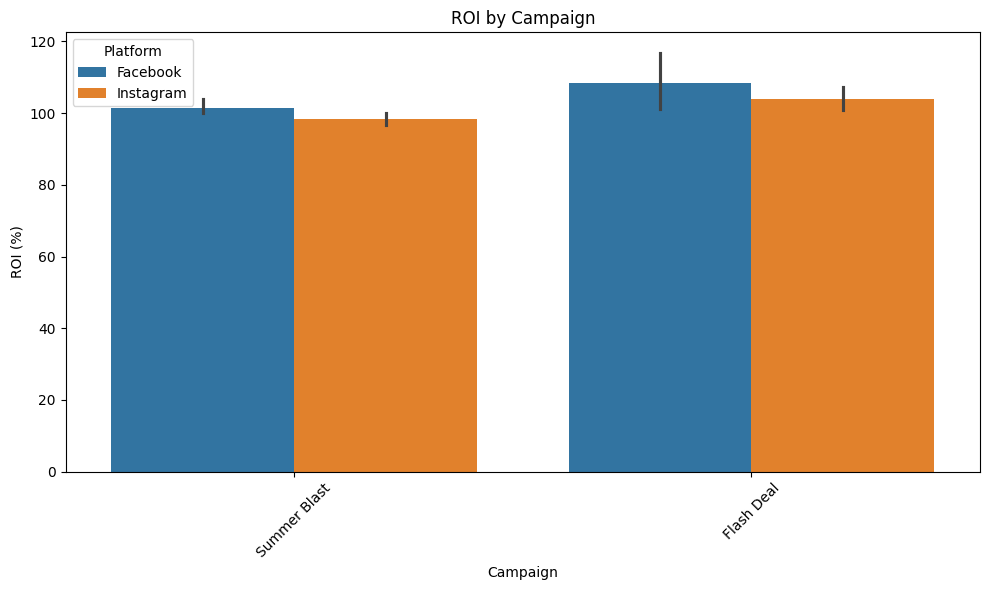

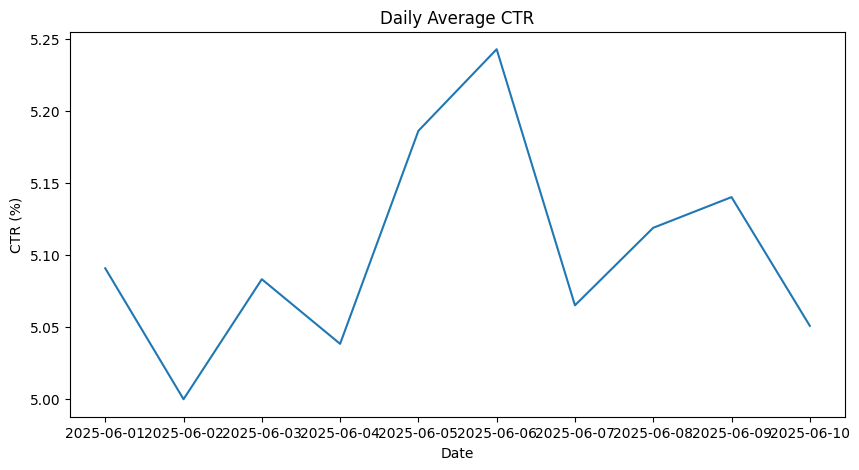

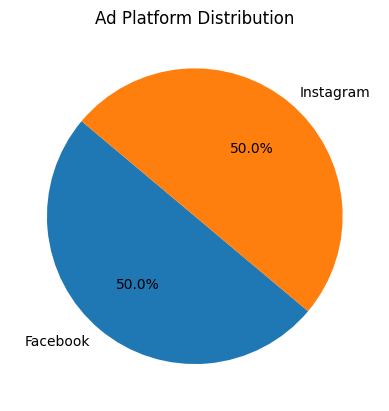

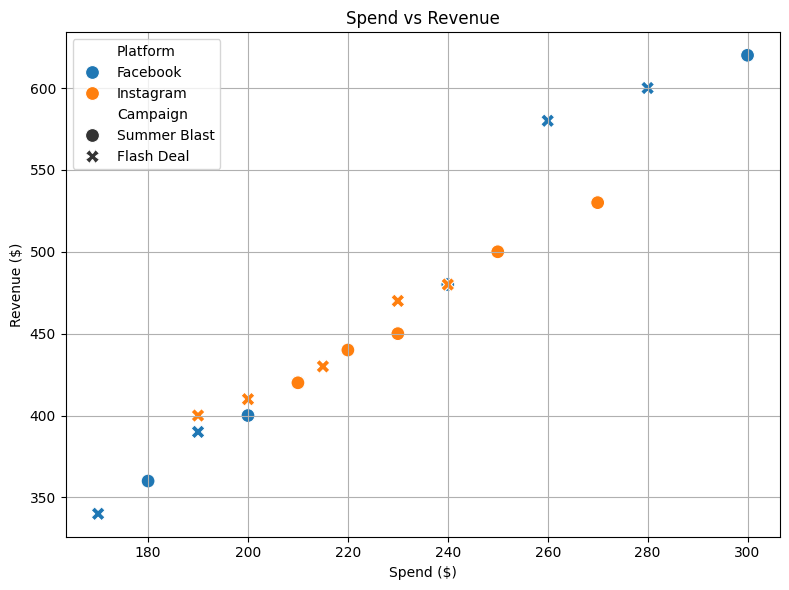

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/intern (1)/ad_campaign_data.csv")
print(df.head())

df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100
df['Engagements'] = df['Likes'] + df['Comments'] + df['Shares']
df['Engagement Rate (%)'] = (df['Engagements'] / df['Impressions']) * 100
df['CPC'] = df['Spend'] / df['Clicks']
df['CPM'] = df['Spend'] / df['Impressions'] * 1000
df['ROI (%)'] = (df['Revenue'] - df['Spend']) / df['Spend'] * 100

plt.figure(figsize=(10,6))
sns.barplot(x='Campaign', y='ROI (%)', data=df, hue='Platform')
plt.title("ROI by Campaign")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Date'] = pd.to_datetime(df['Date'])
daily_ctr = df.groupby('Date')['CTR (%)'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_ctr, x='Date', y='CTR (%)')
plt.title("Daily Average CTR")
plt.show()

platform_counts = df['Platform'].value_counts()
platform_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Ad Platform Distribution')
plt.ylabel('')
plt.show()

fig = px.bar(df, x='Campaign', y='ROI (%)', color='Platform', title='ROI by Campaign')
fig.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Spend', y='Revenue', hue='Platform', style='Campaign', s=100)
plt.title('Spend vs Revenue')
plt.xlabel('Spend ($)')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

bubble = df.groupby('Campaign').agg({
'CTR (%)': 'mean',
'ROI (%)': 'mean',
'CPC': 'mean',
'Impressions': 'sum'
}).reset_index()

fig2 = px.scatter(bubble, x='CPC', y='ROI (%)', size='Impressions', color='Campaign',
hover_name='Campaign', title='Campaign Performance: ROI vs CPC vs CTR Bubble Chart')
fig2.show()